##  Aula 01

Vamos utilizar diversas funcionalidades desta biblioteca para explorar dados de de anúncio de imóveis da cidade de São Paulo. Começaremos a nossa análise de dados entendendo características gerais dos nossos dados e olhando mais no detalhe para os bairros que tem imóveis a venda.

### Importanto as bibliotecas

In [19]:
import pandas as pd
pd.set_option('display.max.rows', None)

### Base de dados

In [17]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dataset = pd.read_csv(url)
dataset.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [18]:
dataset.sample() #trás um registro random

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7963,Avenida Amarilis,Cidade Jardim,São Paulo,840,4,5,8,R$ 5.900.000


### Entendendo os dados que vamos trabalhar

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


**Total de Registros:** 10008

**Colunas:** 8

! **Colunas que talvez eu tenha que alterar:**
    - Valor: Separar a coluna Valor em - Valor e Moeda

In [32]:
dataset.dtypes

Rua          object
Bairro       object
Cidade       object
Metragem      int64
Quartos       int64
Banheiros     int64
Vagas         int64
Valor        object
dtype: object

In [28]:
dataset["Bairro"][6522] #pesquisando o bairo com umm ID específico 

'Vila Paulo Silas'

#### Média Metragem dos apartamentos na vila mariana

In [40]:
imoveis_vila_mariana = (dataset["Bairro"] == "Vila Mariana")
imoveis_vila_mariana= dataset[imoveis_vila_mariana]

In [41]:
imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

#### Quantos bairros temos no dataset e quantas vezes eles aparecem?

In [44]:
n_imoveis_bairro = dataset["Bairro"].value_counts()

Mostrar os 10 bairros com mais imóveis

<AxesSubplot:>

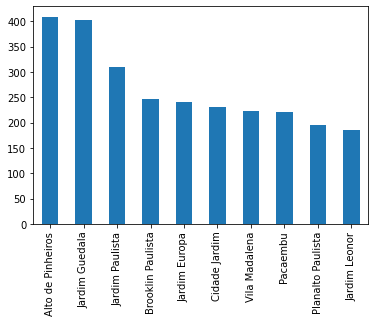

In [47]:
n_imoveis_bairro.head(10).plot.bar()

### 1 - Realizar a média da metragem por bairro

In [61]:
imoveis = (dataset["Bairro"].unique())
imoveis

for bairro in imoveis:
    

Planalto Paulista
Jardim dos Estados
Jardim Reimberg
Jardim Morumbi
Mooca
Santo Amaro
Cidade Mãe do Céu
Jardim Vergueiro
Jardim Benfica
Vila Alpina
Vila Monumento
Jardim Luzitânia
Vila Uberabinha
Jardim Prudência
Lauzane Paulista
Jardim Santa Maria
Vila Nova
Itaberaba
Vila Nova Conceição
Jardim da Saúde
Jardim Santo Antônio
Vila Mazzei
Vila Madalena
Jardim Ivana
Vila Campo Grande
Vila Gomes Cardim
Bela Aliança
Vila Albertina
Cidade Jardim
Parque da Lapa
Vila Libanesa
Cidade Domitila
Vila Nova Savoia
Jardim Maria Estela
Parque São Rafael
Vila Bandeirantes
Parque Colonial
Vila Califórnia
Jardim das Imbuias
Vila Tramontano
Vila Nancy
Parada Inglesa
Jardim Leonor Mendes de Barros
Jardim Iva
Jardim Amália
Vila dos Remédios
Brooklin Paulista
Tremembé
Vila Minerva
Pirituba
Vila Cordeiro
Chácara Santo Antônio (Zona Sul)
Jardim Guedala
Parque Boturussu
Vila Arriete
Jardim Europa
Alto da Lapa
Vila Formosa
Quinta da Paineira
Vila Jaguara
Alto da Boa Vista
Vila Clarice
Jardim América
Jardim Paulis

### 2 - Buscar duas formas de selecionar os dados por bairro

### 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas no DF (colocando alguma conclusão).

### 4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max).

### 5 - Descobrir quais são os bairros que não tem nome de rua.